In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#import jax
#jax.config.update('jax_platform_name', 'cpu')

In [3]:
from entot.plotting.plots import plot_1D
from entot.models.models import KantorovichGapModel
from entot.models.utils import MixtureNormalSampler
import matplotlib.pyplot as plt
import numpy as np
import jax
import jax.numpy as jnp

2023-06-16 08:07:05.989271: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/dominikk/mambaforge/envs/ott/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
source = MixtureNormalSampler([0], 1,  0.5, batch_size=2048)(jax.random.PRNGKey(0))
target = MixtureNormalSampler([-1.0,1.0], 1,  0.1, batch_size=2048)(jax.random.PRNGKey(0))

In [11]:
kg = KantorovichGapModel(epsilon_kant_gap=1e-5, input_dim=[1], callback=plot_1D, k_noise_per_x=1, iterations=1000, callback_iters=100)

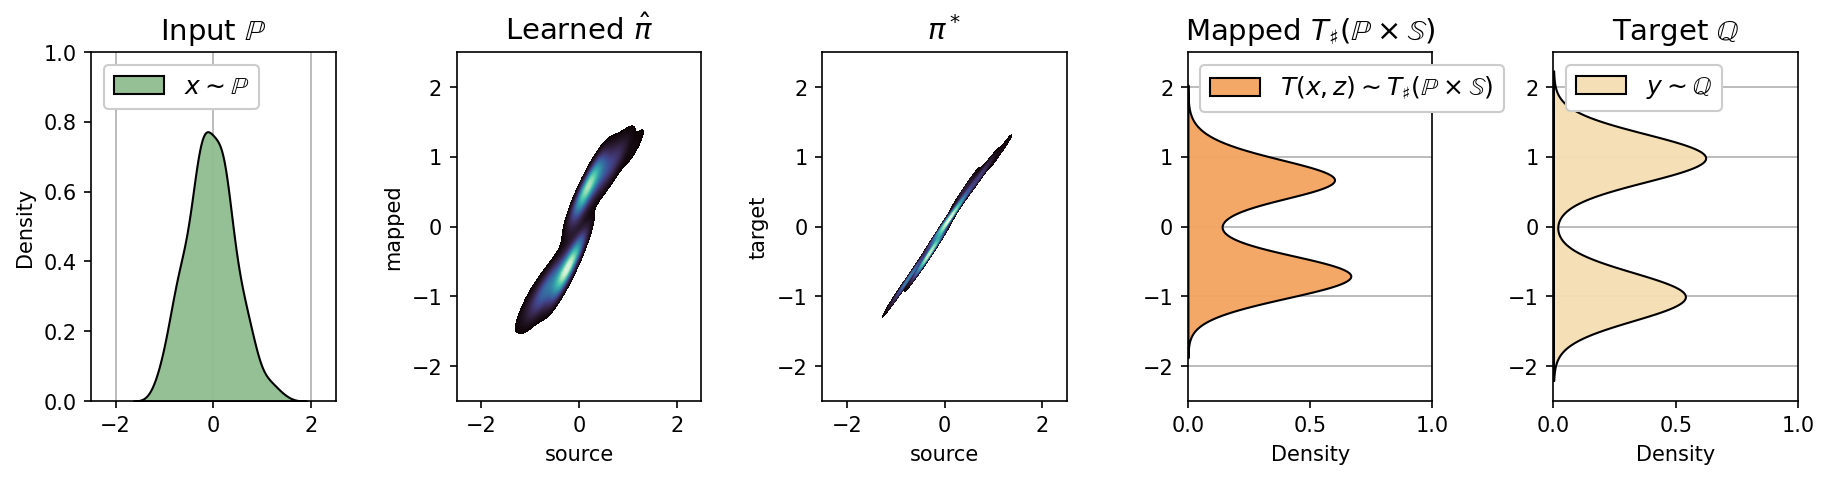

 48%|████▊     | 483/1000 [11:30<12:18,  1.43s/it]


KeyboardInterrupt: 

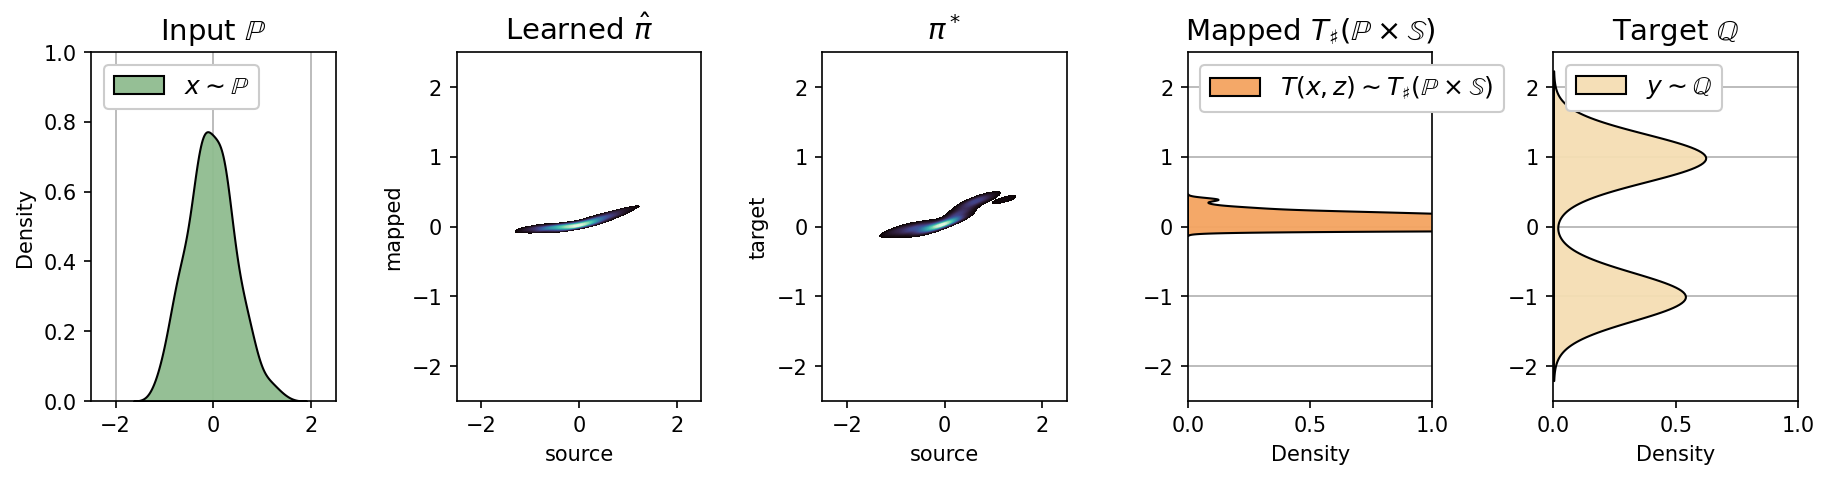

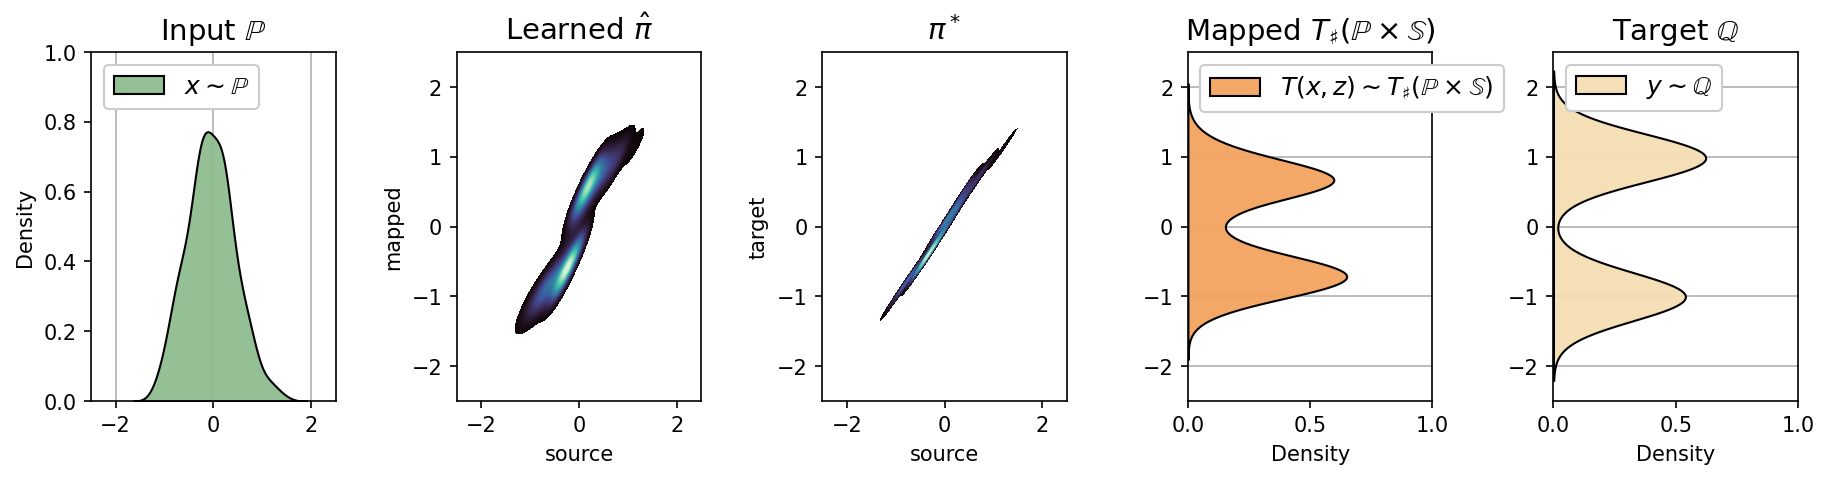

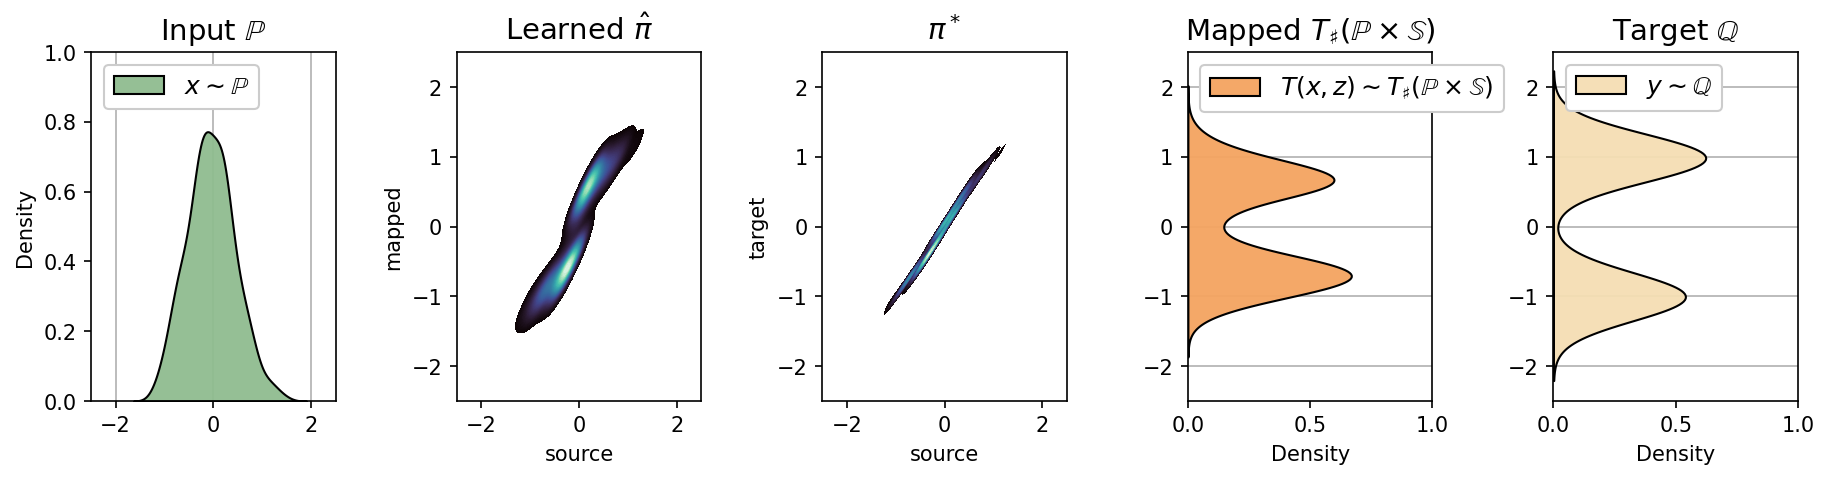

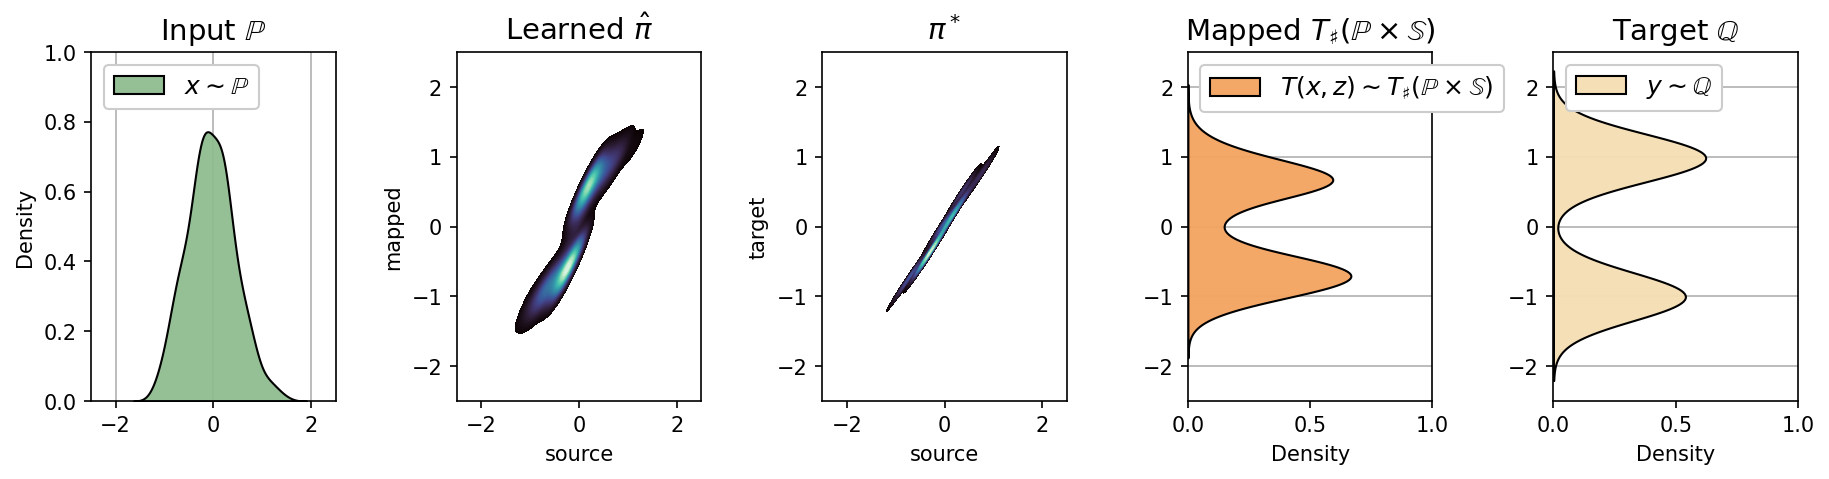

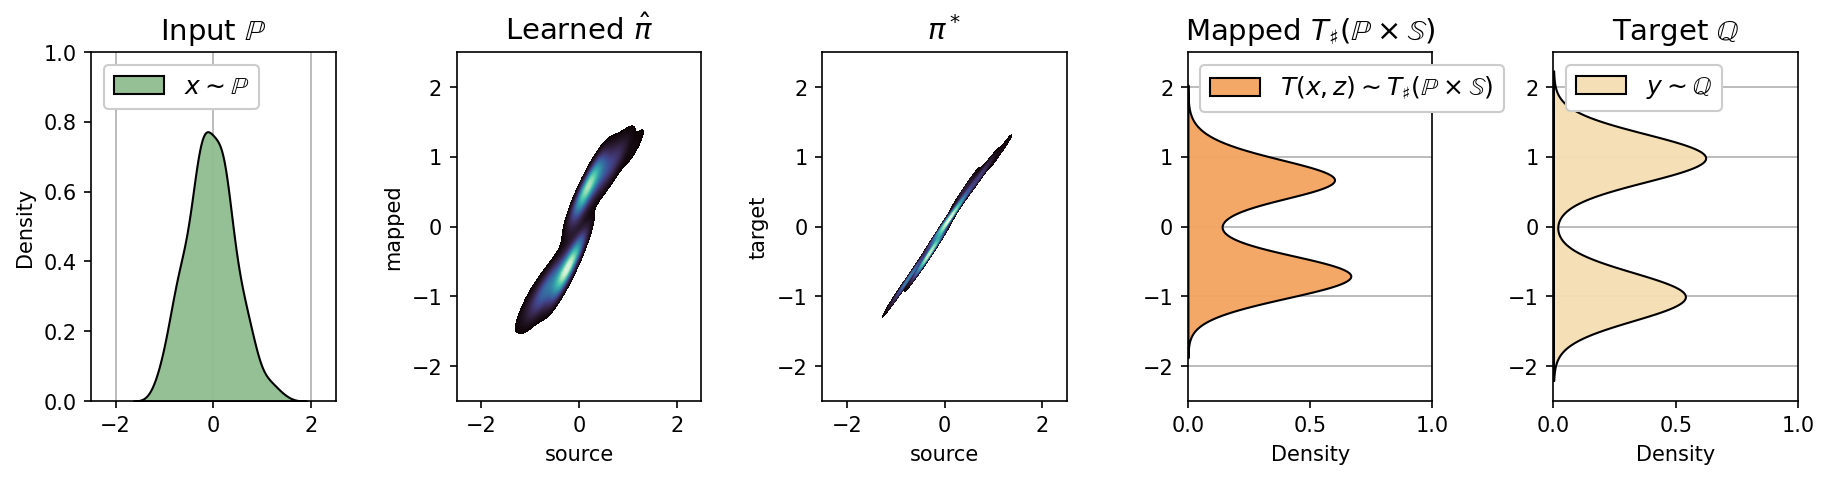

In [12]:
kg(source, target, 256, 256)

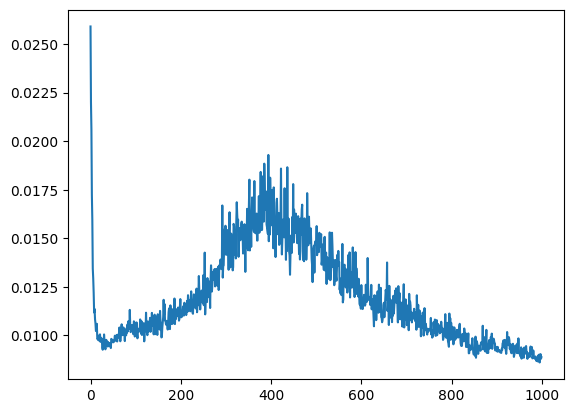

In [15]:
plt.plot(np.arange(len(kg.metrics["kant_gap"])), kg.metrics["kant_gap"])

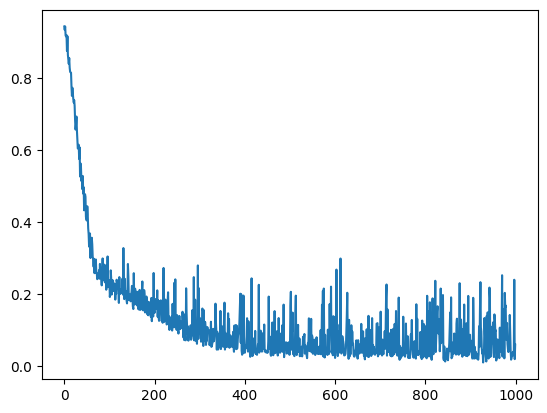

In [16]:
plt.plot(np.arange(len(kg.metrics["fitting_loss"])), kg.metrics["fitting_loss"])